In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

<h2>Read and clean data</h2>

In [4]:
df = pd.read_csv('../data/processed/AllProcessedParamsData.csv')
df_wq_cl = pd.read_csv('../data/processed/waterQualityClimate.csv')
df_wq_cl = df_wq_cl.groupby('Site ID').mean().reset_index()

df_all = df_wq_cl.merge(df, left_on='Site ID', right_on='site_ID')

water_quality_params = ['Cond', 'DO', 'Discharge', 'NO2', 'NO3', 'TDS', 'TP', 'TSS','eCol']
built_env_params = ['RoadDensity',
   'LaneDensity', 'GravelDensity', 'AsphaltDensity', 'ConcreteDensity',
   'StateRdDensity', 'CountyRdDensity', 'CityRdDensity', 'ParcelCtDensity',
   'ParcelAvgArea', 'AgPercent', 'CommercialPercent', 'GreenPercent',
   'IndustryPercent', 'ServicePercent', 'ResidentialPercent',
   'VaccantPercent', 'OpenDevPercent', 'LowDevPercent', 'MedDevPercent',
   'HighDevPercent', 'MedianFloors', 'MedianBuiltYr', 'RangeBuiltYr',
   'FootprintDensity', 'UnitDensity']
climate_params = ['tmean', 'ppt', 'ppt_rx1']
soil_params = ['SoilBPercent', 'SoilCPercent', 'SoilDPercent', 'SoilDepth', 'Slope']


In [52]:
print("Sites with urban environmet data but not water quality data", set(df_wq_cl['Site ID']) - set(df['site_ID']))

print("Sites that has data of TP", set(df_wq_cl[~df_wq_cl['TP'].isna()]['Site ID'].unique()) - set(df['site_ID']))

print("Sites that has data of eCol", set(df_wq_cl[~df_wq_cl['eCol'].isna()]['Site ID'].unique()) - set(df['site_ID']))

Sites with urban environmet data but not water quality data {'WC03', 'Miller03', 'HS01', 'WC02', 'Mill06', 'CC01', 'ADW27', 'SGG02', 'COL02B', 'NHC01', 'HC15', 'ADW26', 'Mill07', 'SO06', 'HC14', 'NC11', 'ADW29', 'DC04'}
Sites that has data of TP {'WC03', 'Miller03', 'HS01', 'WC02', 'CC01', 'ADW27', 'SGG02', 'NHC01', 'COL02B', 'ADW26', 'SO06', 'ADW29', 'DC04'}
Sites that has data of eCol {'Miller03', 'Mill06', 'ADW27', 'SGG02', 'ADW26', 'HC15', 'Mill07', 'HC14', 'ADW29'}


In [54]:
df_all[df_all['TSS'].isna()]

,Site ID,Unnamed: 0_x,yearMonth,Cond,DO,Discharge,NO2,NO3,TDS,TP,...,MedianFloors,MedianBuiltYr,RangeBuiltYr,FootprintDensity,UnitDensity,SoilBPercent,SoilCPercent,SoilDPercent,SoilDepth,Slope
24,DC02,384.5,202008.5,565.350000,4.357000,NaN,NaN,NaN,NaN,NaN,...,5,1978.0,219,0.004012,0.001649,0.358134,0.165076,0.370521,85.306093,0.996770
42,NC02,718.5,201739.5,1144.861111,6.231944,NaN,NaN,NaN,824.777778,NaN,...,5,1993.0,119,0.034950,0.007376,0.316605,0.047665,0.215512,83.458744,1.396736
43,NC06,722.5,202007.5,1133.500000,2.251667,NaN,NaN,NaN,NaN,NaN,...,6,2003.0,119,0.042861,0.003867,0.220064,0.215233,0.330906,84.518719,0.729260
44,NC07,724.0,201607.0,925.333333,4.763333,NaN,NaN,NaN,665.166667,NaN,...,4,1987.0,163,0.060841,0.044702,0.218104,0.181890,0.109228,84.000000,1.254067


In [51]:
df_all[df_all['Site ID']=='NC07'].eCol
pd.read_csv('data/sharedWithMe/HRWC_Data.csv')

44   NaN
Name: eCol, dtype: float64

<h2>Explore pairwise coorelation between variables</h2>

In [58]:
def plot_corr_matrix(corr, title, figsize=(20,20)):
    '''
    Plot the correlation matrix, order: hierarchy cluster
    
    corr(Dataframe): corelation matrix
    title(str): title of plot
    figsize(tuple): size of figure
    '''
    pairwise_dists = 1 - corr
    linkage_matrix = linkage(pairwise_dists, method='average')

    # Create a dendrogram and reorder the correlation matrix
    dendro = dendrogram(linkage_matrix, labels=corr.columns, no_plot=True)
    reordered_columns = dendro['ivl']
    reordered_corr = corr.loc[reordered_columns, reordered_columns]

    # Plot the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(reordered_corr, annot=True, cmap='coolwarm', center=0)
    plt.title(title)
    plt.show()

<ipython-input-58-d7c67e39d927>:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(pairwise_dists, method='average')


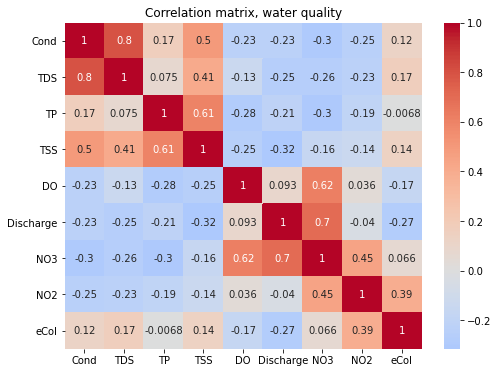

In [66]:
water_quality_corr = df_all[water_quality_params].corr()  
plot_corr_matrix(water_quality_corr, 'Correlation matrix, water quality', (8,6))

<ipython-input-45-e60ccf74464e>:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(pairwise_dists, method='average')


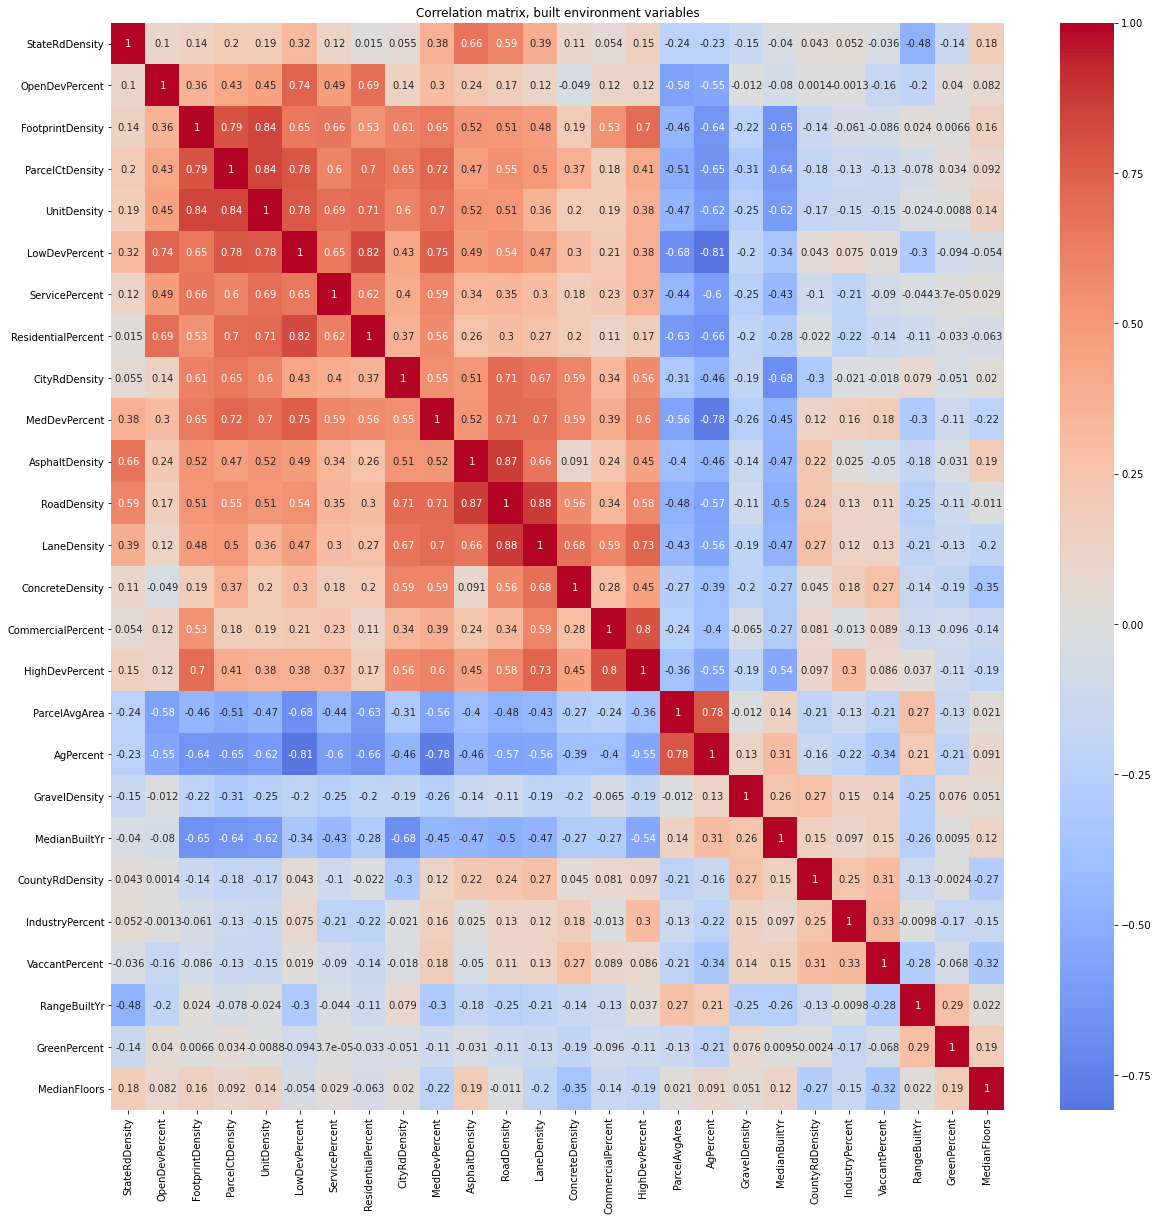

In [53]:
built_env_corr = df_all[built_env_params].corr()  
plot_corr_matrix(built_env_corr, 'Correlation matrix, built environment variables')

<ipython-input-58-d7c67e39d927>:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(pairwise_dists, method='average')


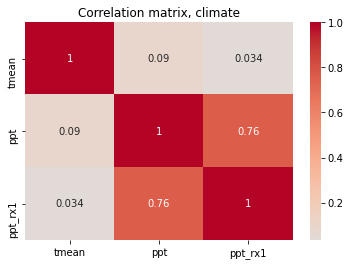

In [62]:
climate_corr = df_all[climate_params].corr()  
plot_corr_matrix(climate_corr, 'Correlation matrix, climate', (6,4))

<ipython-input-58-d7c67e39d927>:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(pairwise_dists, method='average')


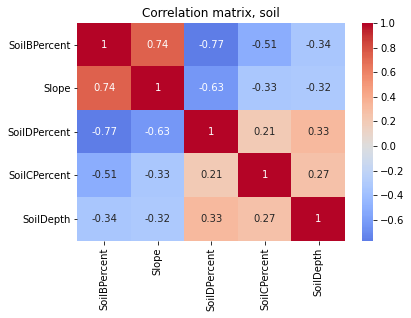

In [63]:
soil_coor = df_all[soil_params].corr()
plot_corr_matrix(soil_coor, 'Correlation matrix, soil', (6,4))

<ipython-input-58-d7c67e39d927>:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(pairwise_dists, method='average')


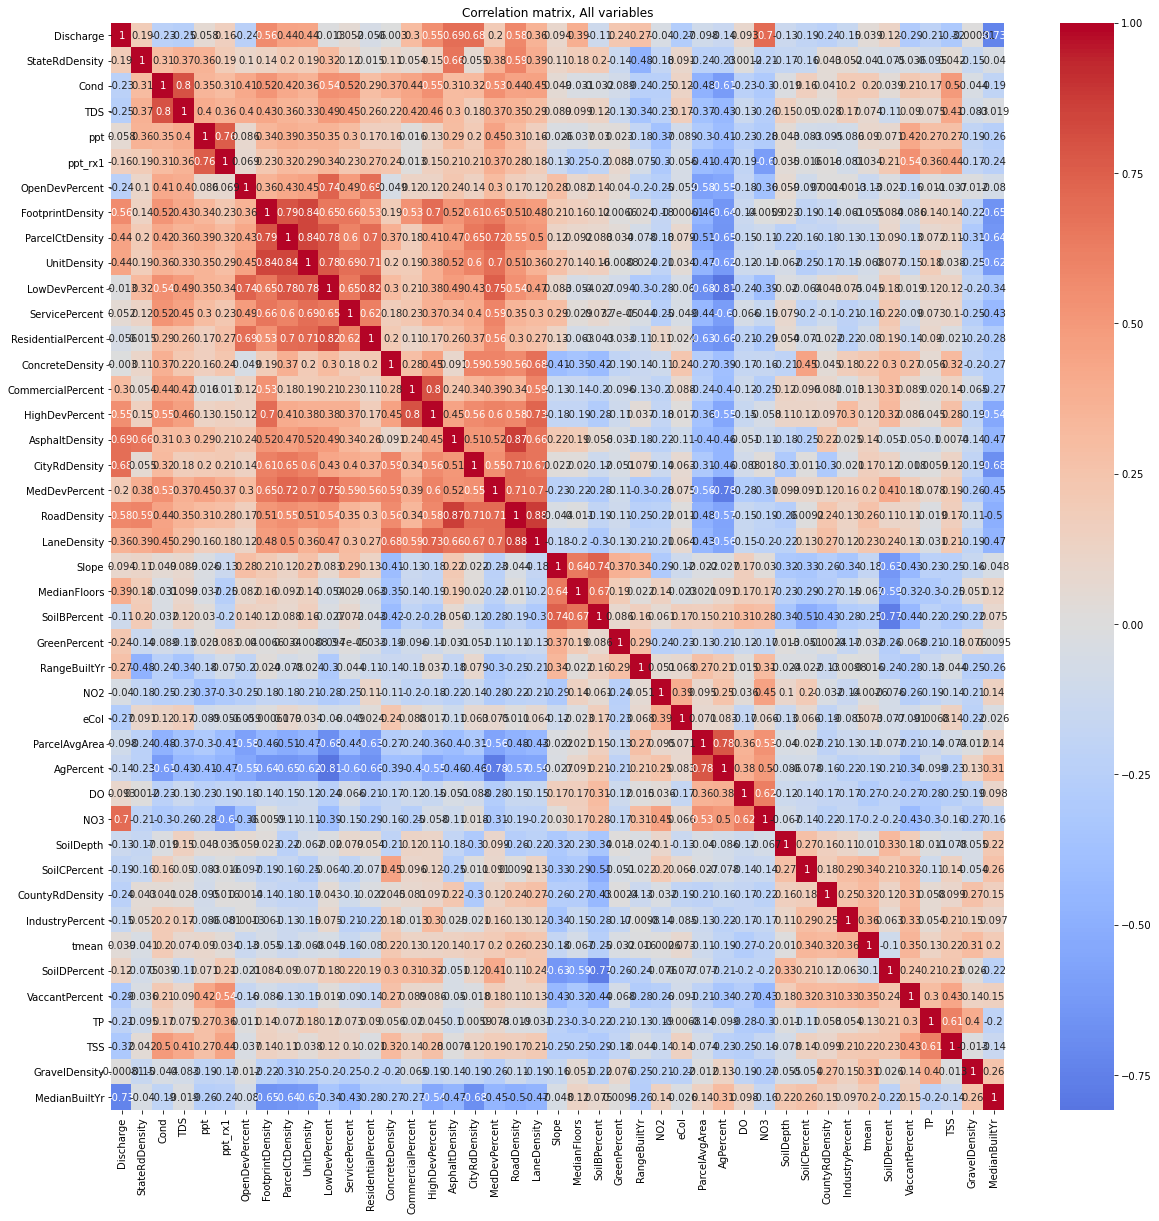

In [69]:
all_corr = df_all[water_quality_params + built_env_params + climate_params + soil_params].corr()  
plot_corr_matrix(all_corr, 'Correlation matrix, All variables')

<h2>
Cluster the built environment variables, then see the built environment variables, water quality / climate for each cluster
</h2>

In [75]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [93]:
df_all = df_all.rename(columns={'Site ID': 'Site_ID'})
df = df_all[['Site_ID'] + built_env_params]
df.to_csv('../data/processed/intermediate/built_env.csv')

In [102]:
df = df_all[['Site_ID'] + water_quality_params + built_env_params + climate_params + soil_params]
df.set_index('Site_ID', inplace=True)

In [103]:
df.to_csv('../data/processed/intermediate/all_params.csv')

<ipython-input-86-b50972534670>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = clusters


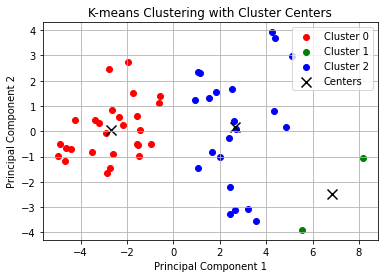

In [86]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Perform k-means clustering
n_clusters = 3  # Change this number based on your specific use case
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the DataFrame

df['Cluster'] = clusters

# If your DataFrame has more than 2 features, use PCA to reduce to 2 dimensions for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for cluster in range(n_clusters):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], 
                color=colors[cluster % len(colors)], label=f'Cluster {cluster}')

# Plot the cluster centers
centers = kmeans.cluster_centers_
pca_centers = pca.transform(centers)
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], 
            color='black', marker='x', s=100, label='Centers')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with Cluster Centers')
plt.legend()
plt.grid(True)
plt.show()

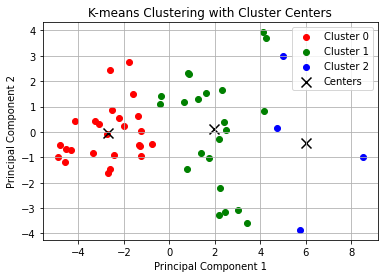